In [66]:
from dotenv import load_dotenv
import os
import pandas as pd
import psycopg2 as pg
import matplotlib.pyplot as plt
import seaborn as sns
import bar_chart_race as bcr

load_dotenv()

True

In [10]:
# DB connection parameters
hostname = os.environ.get('host'),
database = os.environ.get('database')
user = os.environ.get('user')
password = os.environ.get('password')
sslmode = 'disable'



In [50]:
# Create connection and cursor
conn_string = "host={} dbname={} user={} password={} sslmode={}".format(hostname[0],
                                                                        database,
                                                                        user,
                                                                        password,
                                                                        sslmode)
conn = pg.connect(conn_string)

sql = """
SELECT *
FROM dev_trend_data
"""


df = pd.read_sql_query(sql, conn, parse_dates=['date'])
conn.close()

df.head()

,date,city,state,country_code,zip,units,album,song,artist,song_isrc,album_upc,release_type,transaction_type,provider
0,2020-07-06,Anchorage,AK,United States,99507,1,Levante,Levante,Carbon Citizens,TCAEX2086952,'859739854381',Single,Song,itunes
1,2020-07-06,Ogden,UT,United States,84414,1,Gatti,Gatti,Carbon Citizens,TCAEX2087822,'859739858860',Single,Song,itunes
2,2020-07-08,Ogden,UT,United States,84414,1,S.R.T.,S.R.T.,Carbon Citizens,TCAEX2086871,'859739853995',Single,Song,itunes
3,2020-07-08,Hull,MA,United States,02045,1,Gatti,Gatti,Carbon Citizens,TCAEX2087822,'859739858860',Single,Song,itunes
4,2020-07-09,Ogden,UT,United States,84414,1,R8,R8,Carbon Citizens,TCAEX2086903,'859739854190',Single,Song,itunes


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17962 entries, 0 to 17961
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              17962 non-null  datetime64[ns]
 1   city              17962 non-null  object        
 2   state             17962 non-null  object        
 3   country_code      17962 non-null  object        
 4   zip               17962 non-null  object        
 5   units             17962 non-null  int64         
 6   album             17962 non-null  object        
 7   song              17962 non-null  object        
 8   artist            17962 non-null  object        
 9   song_isrc         17962 non-null  object        
 10  album_upc         17962 non-null  object        
 11  release_type      17962 non-null  object        
 12  transaction_type  17962 non-null  object        
 13  provider          17962 non-null  object        
dtypes: datetime64[ns](1), 

In [56]:
#df up to 31 july
df_to_aug = df.query('date < "2020-07-31"')

In [57]:
play_counts = df['song'].value_counts()
counts_order = play_counts.index

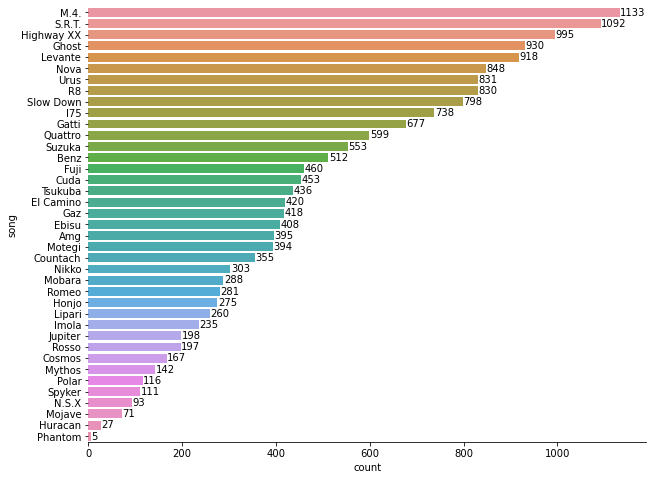

In [58]:
fig, ax = plt.subplots(figsize = (10,8))

ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)

sns.countplot(data = df, y = 'song', order = counts_order)

#n_plays = df['song'].value_counts().sum()
#max_type_count = play_counts[0]
#max_prop = max_type_count / n_plays
#max_prop

for i in range(play_counts.shape[0]):
    count = play_counts[i]
    plt.text(count + 1, i, play_counts.values[i], va = 'center');



In [75]:
song_date = df.groupby(['date','song']).sum().reset_index()

In [80]:
song_date = song_date.pivot(index = 'date', columns= 'song', values='units').copy()

In [84]:
#bar chart race of song plays per day
bcr.bar_chart_race(df = song_date, 
                   n_bars=5,
                  steps_per_period=5)

C:\Users\User\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\User\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
C:\Users\User\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "


In [85]:
song_date

song,Amg,Benz,Cosmos,Countach,Cuda,Ebisu,El Camino,Fuji,Gatti,Gaz,...,Quattro,R8,Romeo,Rosso,S.R.T.,Slow Down,Spyker,Suzuka,Tsukuba,Urus
date,,,,,,,,,,,,,,,,,,,,,
2020-07-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.0,28.0,...,41.0,60.0,NaN,NaN,65.0,57.0,NaN,NaN,NaN,63.0
2020-07-06,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,34.0,6.0,...,21.0,40.0,NaN,NaN,43.0,42.0,NaN,NaN,NaN,37.0
2020-07-07,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,40.0,15.0,...,28.0,37.0,NaN,NaN,46.0,52.0,NaN,NaN,NaN,52.0
2020-07-08,NaN,NaN,NaN,NaN,16.0,NaN,11.0,NaN,37.0,10.0,...,38.0,48.0,NaN,NaN,51.0,33.0,NaN,NaN,NaN,53.0
2020-07-09,NaN,NaN,NaN,NaN,35.0,NaN,11.0,NaN,32.0,12.0,...,23.0,21.0,NaN,NaN,58.0,16.0,NaN,NaN,NaN,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-26,4.0,7.0,25.0,4.0,6.0,9.0,7.0,11.0,28.0,10.0,...,14.0,19.0,15.0,6.0,73.0,24.0,161.0,40.0,10.0,33.0
2020-09-27,4.0,5.0,14.0,1.0,3.0,7.0,1.0,8.0,22.0,6.0,...,10.0,21.0,17.0,11.0,68.0,17.0,77.0,64.0,11.0,22.0
2020-09-28,11.0,14.0,22.0,13.0,14.0,14.0,10.0,17.0,32.0,10.0,...,21.0,47.0,19.0,19.0,68.0,36.0,78.0,50.0,21.0,37.0


In [96]:
song_date_culm = song_date.expanding(1).sum()

In [107]:
bcr.bar_chart_race(df = song_date_culm,
                   n_bars=10,
                   dpi=144,
                   perpendicular_bar_func='mean',
                  shared_fontdict={'family' : 'Comic Sans', 'weight' : 'normal', 'color' : '.1'})

C:\Users\User\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
C:\Users\User\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))
C:\Users\User\anaconda3\lib\site-packages\bar_chart_race\_make_chart.py:226: UserWarning: Some of your columns never make an appearance in the animation. To reduce color repetition, set `filter_column_colors` to `True`
  warnings.warn("Some of your columns never make an appearance in the animation. "
